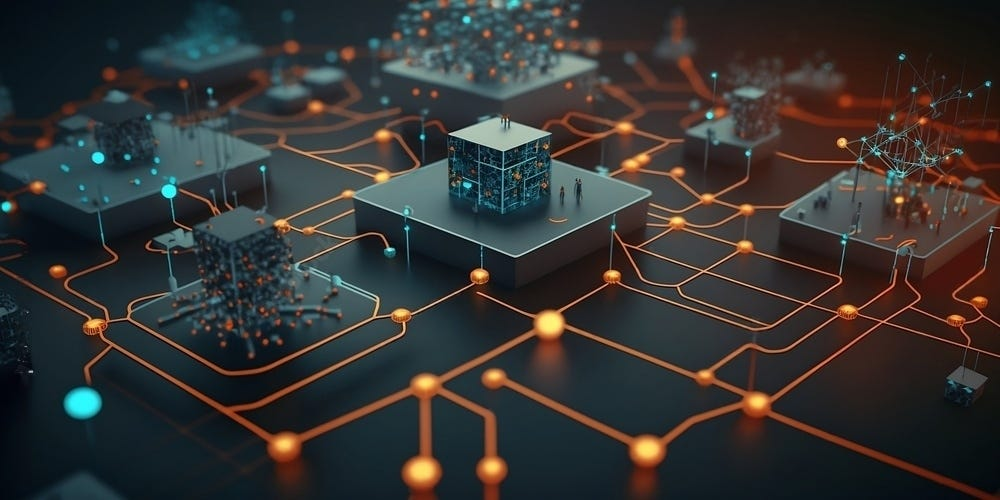

**Twitter Comment Analysis NLP – Predictive Model for Offensive Content Detection**

**Introduction:**

With the escalating presence of offensive content on social media platforms, the need for effective strategies to combat its spread has never been more critical. Such content not only harms individuals and organizations but also poses significant societal challenges. To tackle this issue, there's a growing emphasis on developing robust systems capable of accurately identifying and flagging offensive content in real-time. These systems play a pivotal role in either removing such content automatically or flagging it for human review. By implementing these measures, social media platforms aim to cultivate a safer and more respectful online environment for all users.





In [ ]:
#import libraries
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
#download module available with NLP
nltk.download('punkt')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
data = pd.read_csv("https://raw.githubusercontent.com/Gurpreetpurewal/NLP/main/train.csv")
print(data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


      id                                              tweet label
0  86426  @USER She should ask a few native Americans wh...   UNT
1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...   TIN
2  16820  Amazon is investigating Chinese employees who ...   NOT
3  62688  @USER Someone should'veTaken" this piece of sh...   UNT
4  43605  @USER @USER Obama wanted liberals &amp; illega...   NOT


**Problem Statement Identification:**

In this analysis, I am utilize a Twitter dataset sourced from GitHub, accessed via its raw link. The primary objective is to predict whether user comments fall into distinct categories based on the presence of offensive language. These categories are defined as follows:


*   Not Offensive (NOT): Denotes posts that lack any form of offensive or profane language.
*   Targeted Insult (TIN): Refers to posts containing explicit insults or threats directed towards an individual, group, or any other entity.
*   Untargeted (UNT): Encompasses posts featuring non-targeted profanity and swearing. This category includes posts with generalized profanity that does not specifically target anyone but still contains inappropriate language.

The aim is to develop a model capable of accurately categorizing user comments into one of these three categories, thereby enabling effective content moderation and fostering a more respectful online environment.

In [ ]:
data.tail()

id                                              tweet label
13235  95338  @USER Sometimes I get strong vibes from people...   TIN
13236  67210  Benidorm ✅  Creamfields ✅  Maga ✅   Not too sh...   NOT
13237  82921  @USER And why report this garbage.  We don't g...   TIN
13238  27429                                        @USER Pussy   UNT
13239  46552  #Spanishrevenge vs. #justice #HumanRights and ...   NOT


**Data Cleaning:**

Data cleaning involves examining datasets for missing values. If any gaps in the data are identified, we can take several steps to address them, including removing the affected values, dropping corresponding columns, or eliminating entire rows from the dataset.

In [ ]:
# Checking if there is any null values in dataset
x = data.isnull().sum()
y = (data.isnull().sum()/data.shape[0])*100
z = {'total number of missing values':x,'percentage of missing values':y}
df = pd.DataFrame(z,columns=['total number of missing values','percentage of missing values'])
df.sort_values(by='percentage of missing values', ascending=False)
print(df)

       total number of missing values  percentage of missing values
id                                  0                           0.0
tweet                               0                           0.0
label                               0                           0.0


**Data Preprocessing:**


*   re.sub: Utilizing regular expressions, this function eliminates any special characters, punctuation, and numbers from the text, retaining only alphabetic characters and spaces.
*   text.lower(): This operation converts all alphabetic characters within the text to lowercase, ensuring uniformity for subsequent analysis.

*   word_tokenize: Tokenization is employed to segment the text into individual words or tokens, facilitating further processing and analysis.
*   TweetTokenizer: By utilizing the NLTK library, this line instantiates a TweetTokenizer object. Specifically designed for tweets, it adeptly handles hashtags, mentions, and emoticons present in social media text.

*   stopwords.words: Removing stopwords from the token list enhances the quality of text analysis by filtering out common words that typically do not contribute significantly to the meaning of the text.

In [ ]:
fn = [word_tokenize(word)for word in data['tweet']]
print(fn)

[['@', 'USER', 'She', 'should', 'ask', 'a', 'few', 'native', 'Americans', 'what', 'their', 'take', 'on', 'this', 'is', '.'], ['@', 'USER', '@', 'USER', 'Go', 'home', 'you', '’', 're', 'drunk', '!', '!', '!', '@', 'USER', '#', 'MAGA', '#', 'Trump2020', '👊🇺🇸👊', 'URL'], ['Amazon', 'is', 'investigating', 'Chinese', 'employees', 'who', 'are', 'selling', 'internal', 'data', 'to', 'third-party', 'sellers', 'looking', 'for', 'an', 'edge', 'in', 'the', 'competitive', 'marketplace', '.', 'URL', '#', 'Amazon', '#', 'MAGA', '#', 'KAG', '#', 'CHINA', '#', 'TCOT'], ['@', 'USER', 'Someone', "should'veTaken", "''", 'this', 'piece', 'of', 'shit', 'to', 'a', 'volcano', '.', '😂', "''"], ['@', 'USER', '@', 'USER', 'Obama', 'wanted', 'liberals', '&', 'amp', ';', 'illegals', 'to', 'move', 'into', 'red', 'states'], ['@', 'USER', 'Liberals', 'are', 'all', 'Kookoo', '!', '!', '!'], ['@', 'USER', '@', 'USER', 'Oh', 'noes', '!', 'Tough', 'shit', '.'], ['@', 'USER', 'was', 'literally', 'just', 'talking', 'about',

In [ ]:
tokenr = TweetTokenizer()
tk = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
tw = [tk.tokenize(words)for words in data['tweet']]
print(tw)

[['she', 'should', 'ask', 'a', 'few', 'native', 'americans', 'what', 'their', 'take', 'on', 'this', 'is', '.'], ['go', 'home', 'you', '’', 're', 'drunk', '!', '!', '!', '#maga', '#trump2020', '👊', '🇺🇸', '👊', 'url'], ['amazon', 'is', 'investigating', 'chinese', 'employees', 'who', 'are', 'selling', 'internal', 'data', 'to', 'third-party', 'sellers', 'looking', 'for', 'an', 'edge', 'in', 'the', 'competitive', 'marketplace', '.', 'url', '#amazon', '#maga', '#kag', '#china', '#tcot'], ['someone', "should'vetaken", '"', 'this', 'piece', 'of', 'shit', 'to', 'a', 'volcano', '.', '😂', '"'], ['obama', 'wanted', 'liberals', '&', 'illegals', 'to', 'move', 'into', 'red', 'states'], ['liberals', 'are', 'all', 'kookoo', '!', '!', '!'], ['oh', 'noes', '!', 'tough', 'shit', '.'], ['was', 'literally', 'just', 'talking', 'about', 'this', 'lol', 'all', 'mass', 'shootings', 'like', 'that', 'have', 'been', 'set', 'ups', '.', 'it', '’', 's', 'propaganda', 'used', 'to', 'divide', 'us', 'on', 'major', 'issues

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB


<Axes: xlabel='label', ylabel='count'>

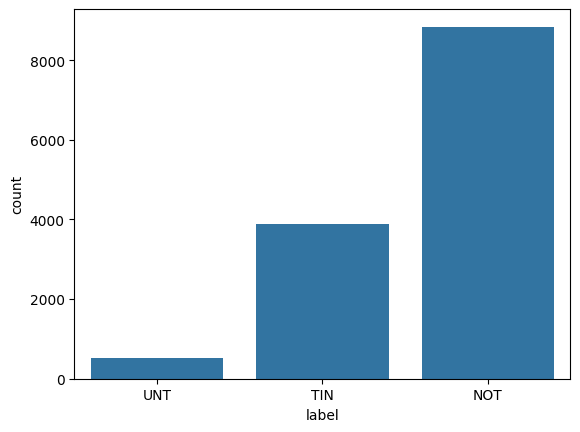

In [ ]:
# Visualization of Data
sns.countplot(x=data['label'])

**In the preceding output dataset, we observe three distinct columns**:

1.   ID: This column serves as a unique identifier for each entry.
2.   Tweet: This column contains the text of the tweets.
1.   Label: This column encompasses three distinct entities: UNT, TIN, and NOT, categorizing the tweets accordingly.

Furthermore, the dataset comprises a total of 10,000 entries.

In [ ]:
def text_preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text_lower = text.lower()
    text_tokens = word_tokenize(text_lower)
    text_sentence = ' '.join(text_tokens)
    tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tweet_tokens = tknzr.tokenize(text_sentence)
    tokens_without_stopwords = [word for word in tweet_tokens if word not in stopwords.words('english')]
    preprocessed_t = ' '.join(tokens_without_stopwords)
    return preprocessed_t

In [ ]:
data['tweet_clean'] = data['tweet'].apply(text_preprocess)

In [ ]:
print(data['tweet_clean'].head())

0                       user ask native americans take
1    user user go home youre drunk user maga trump url
2    amazon investigating chinese employees selling...
3        user someone shouldvetaken piece shit volcano
4    user user obama wanted liberals amp illegals m...
Name: tweet_clean, dtype: object


Once text preprocessing has been applied and the dataset has been thoroughly checked for any missing values, it is now primed for utilization within a machine learning model. This model serves the purpose of analyzing comments to discern their offensive nature.

In [ ]:
# convert text to tokens
list_tokenised_tweet = [word_tokenize(tweet) for tweet in data['tweet']]
print(list_tokenised_tweet[:3])

[['@', 'USER', 'She', 'should', 'ask', 'a', 'few', 'native', 'Americans', 'what', 'their', 'take', 'on', 'this', 'is', '.'], ['@', 'USER', '@', 'USER', 'Go', 'home', 'you', '’', 're', 'drunk', '!', '!', '!', '@', 'USER', '#', 'MAGA', '#', 'Trump2020', '👊🇺🇸👊', 'URL'], ['Amazon', 'is', 'investigating', 'Chinese', 'employees', 'who', 'are', 'selling', 'internal', 'data', 'to', 'third-party', 'sellers', 'looking', 'for', 'an', 'edge', 'in', 'the', 'competitive', 'marketplace', '.', 'URL', '#', 'Amazon', '#', 'MAGA', '#', 'KAG', '#', 'CHINA', '#', 'TCOT']]


In [ ]:
# Let's merge to tokens back into sentences by adding a space between two tokens.
list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_tweet]
print(list_tokenised_sentences[:2])

# add new column to data frame
data['Tokenised_Tweet'] = list_tokenised_sentences
data.head()

['@ USER She should ask a few native Americans what their take on this is .', '@ USER @ USER Go home you ’ re drunk ! ! ! @ USER # MAGA # Trump2020 👊🇺🇸👊 URL']


id                                              tweet label  \
0  86426  @USER She should ask a few native Americans wh...   UNT   
1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...   TIN   
2  16820  Amazon is investigating Chinese employees who ...   NOT   
3  62688  @USER Someone should'veTaken" this piece of sh...   UNT   
4  43605  @USER @USER Obama wanted liberals &amp; illega...   NOT   

                                         tweet_clean  \
0                     user ask native americans take   
1  user user go home youre drunk user maga trump url   
2  amazon investigating chinese employees selling...   
3      user someone shouldvetaken piece shit volcano   
4  user user obama wanted liberals amp illegals m...   

                                     Tokenised_Tweet  
0  @ USER She should ask a few native Americans w...  
1  @ USER @ USER Go home you ’ re drunk ! ! ! @ U...  
2  Amazon is investigating Chinese employees who ...  
3  @ USER Someone should'veTaken '' this piece of...  
4  @ USER @ USER Obama wanted liberals & amp ; il...

In [ ]:
wnl = WordNetLemmatizer()

list_lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list_tokenised_tweet:
  lemma_words = [wnl.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  list_lemmatised_sentences.append(lemma_sentence)

print(list_lemmatised_sentences[:2])

# add new column to data frame
data['Lemmatised_Tweet'] = list_lemmatised_sentences

data.head()

['@ USER She should ask a few native Americans what their take on this is .', '@ USER @ USER Go home you ’ re drunk ! ! ! @ USER # MAGA # Trump2020 👊🇺🇸👊 URL']


id                                              tweet label  \
0  86426  @USER She should ask a few native Americans wh...   UNT   
1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...   TIN   
2  16820  Amazon is investigating Chinese employees who ...   NOT   
3  62688  @USER Someone should'veTaken" this piece of sh...   UNT   
4  43605  @USER @USER Obama wanted liberals &amp; illega...   NOT   

                                         tweet_clean  \
0                     user ask native americans take   
1  user user go home youre drunk user maga trump url   
2  amazon investigating chinese employees selling...   
3      user someone shouldvetaken piece shit volcano   
4  user user obama wanted liberals amp illegals m...   

                                     Tokenised_Tweet  \
0  @ USER She should ask a few native Americans w...   
1  @ USER @ USER Go home you ’ re drunk ! ! ! @ U...   
2  Amazon is investigating Chinese employees who ...   
3  @ USER Someone should'veTaken '' this piece of...   
4  @ USER @ USER Obama wanted liberals & amp ; il...   

                                    Lemmatised_Tweet  
0  @ USER She should ask a few native Americans w...  
1  @ USER @ USER Go home you ’ re drunk ! ! ! @ U...  
2  Amazon is investigating Chinese employee who a...  
3  @ USER Someone should'veTaken '' this piece of...  
4  @ USER @ USER Obama wanted liberal & amp ; ill...

In [ ]:
# get English stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
RANDOM_SEED = 100

In [ ]:
# use raw tweet
X_train_tweet, X_val_tweet, y_train, y_val = train_test_split(data['tweet'], data['label'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_tweet)}')
print(f'validation data set size: {len(X_val_tweet)}')

# use tokenised tweet
X_train_tokenised_tweet, X_val_tokenised_tweet, y_train, y_val = train_test_split(data['Tokenised_Tweet'], data['label'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_tokenised_tweet)}')
print(f'validation data set size: {len(X_val_tokenised_tweet)}')


training data set size: 9268
validation data set size: 3972
training data set size: 9268
validation data set size: 3972


**Model One:**

Applying Logistic Regression, Confusion Matrix and Heat Map Analysis.

After employing Model One, which incorporates logistic regression, we conducted training and validation on the dataset. Our analysis reveals that the model achieved an accuracy of approximately 73%.

Furthermore, the findings indicate that the majority of comments classified by Model One are deemed non-offensive.


Classification Report using Logistic Regression               precision    recall  f1-score   support

         NOT       0.74      0.95      0.83      1733
         TIN       0.70      0.37      0.49       792
         UNT       0.40      0.02      0.03       123

    accuracy                           0.73      2648
   macro avg       0.61      0.45      0.45      2648
weighted avg       0.71      0.73      0.69      2648

Accuracy of logistic regression = 0.7348942598187311


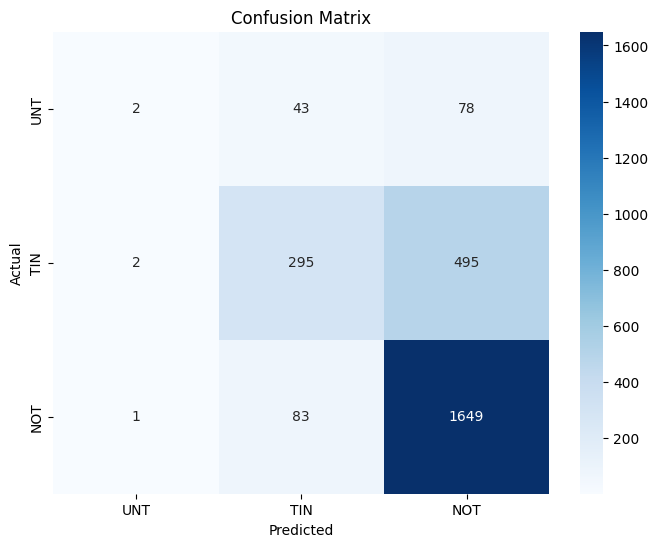

In [ ]:
#machine learning model libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

tfidf_vector = TfidfVectorizer()
x=tfidf_vector.fit_transform(data['tweet_clean'])

x_train,x_val,y_train,y_val = train_test_split(x,data['label'], test_size=0.2,random_state=42)
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(x_train,y_train)

y_pred = logistic_regression.predict(x_val)

class_report = classification_report(y_val, y_pred)

accuracy_logistic = accuracy_score(y_val, y_pred)
print("Classification Report using Logistic Regression", class_report)
print("Accuracy of logistic regression =",accuracy_logistic)

cm = confusion_matrix(y_val, y_pred, labels=data['label'].unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data['label'].unique(), yticklabels=data['label'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Now using test dataset for prediction
predict_data = pd.read_csv("https://raw.githubusercontent.com/Gurpreetpurewal/NLP/main/test.csv")
X_test = tfidf_vector.transform(predict_data['tweet'])
predictions = logistic_regression.predict(X_test)
predict_data['Prediction'] = predictions
predict_data.to_csv('Result.csv', index=False)
print(predictions)

['TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'TIN' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'TIN' 'TIN' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'TIN'
 'TIN' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT'
 'NOT' 'TIN' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'TIN' 'NOT'
 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'N

**Model Second Naive Bayes:**

Upon implementing the Naive Bayes algorithm for classification, a comparison was conducted using various evaluation metrics, including the confusion matrix and heat map.

Results revealed that the accuracy of Model Second, approximately 68%, was lower compared to Model One.

Furthermore, analysis of Model Second indicated that approximately 90% of the comments were classified as non-offensive according to its predictions.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report using Logistic Regression
              precision    recall  f1-score   support

         NOT       0.68      1.00      0.81      3533
         TIN       0.79      0.07      0.13      1548
         UNT       0.00      0.00      0.00       215

    accuracy                           0.69      5296
   macro avg       0.49      0.36      0.31      5296
weighted avg       0.69      0.69      0.58      5296

Accuracy of logistic regression = 0.6867447129909365
 


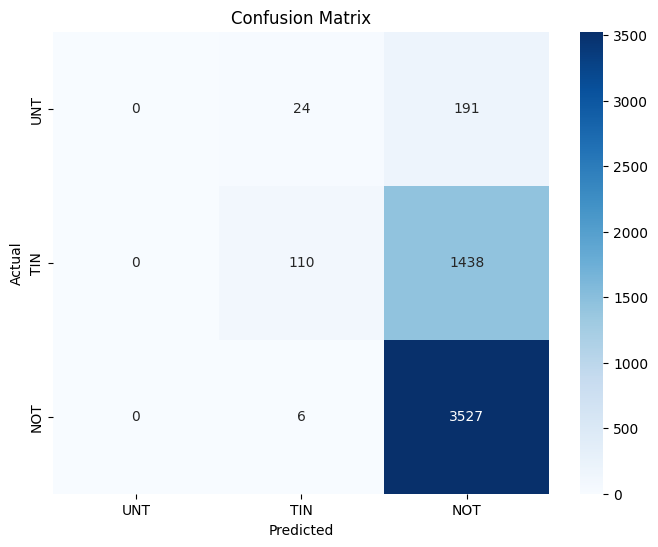

In [ ]:
# now checking with another model naive_bayes
from sklearn.naive_bayes import MultinomialNB
naive_tfide = TfidfVectorizer()
x_n = naive_tfide.fit_transform(data['tweet_clean'])

x_train_n,x_val_n,y_train_n,y_val_n = train_test_split(x_n,data['label'],test_size=0.4, random_state=100)

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train_n,y_train_n)

y_predict = naive_bayes_model.predict(x_val_n)
naive_bayes_model_classification = classification_report(y_val_n, y_predict)
accuracy_naive_byes = accuracy_score(y_val_n, y_predict)

print("Classification Report using Logistic Regression")
print(naive_bayes_model_classification)
print("Accuracy of logistic regression =",accuracy_naive_byes)
print(" ")

cm = confusion_matrix(y_val_n, y_predict, labels=data['label'].unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data['label'].unique(), yticklabels=data['label'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Now using test dataset for prediction
predict_data = pd.read_csv("https://raw.githubusercontent.com/Gurpreetpurewal/NLP/main/test.csv")
X_test = naive_tfide.transform(predict_data['tweet'])
predictions_naive_bayes = naive_bayes_model.predict(X_test)
predict_data['Prediction_naive_bayes'] = predictions_naive_bayes
predict_data.to_csv('naive_bayes_model.csv', index=False)
print(predictions_naive_bayes)

['NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'TIN' 'TIN' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'N

In [ ]:
print("Accuracy of logistic regression =",accuracy_logistic)
print("Accuracy of Naive Byes =",accuracy_naive_byes)

Accuracy of logistic regression = 0.7348942598187311
Accuracy of Naive Byes = 0.6867447129909365



**Conclusion:**

After evaluating the performance of various models, it is evident that the logistic regression model outperforms others with an accuracy of 73.48%. Following closely is the Naive Bayes model with an accuracy of 68.67%. Hence, for this Twitter Comment Analysis task, the logistic regression model emerges as the optimal choice.

In [ ]:
import json

import pandas as pd

test_file_path = "/content/Result.csv"
df_test = pd.read_csv(test_file_path)
df_test = df_test[["id", "Prediction"]]

data = []
for index, row in df_test.iterrows():
    data.append({'id': row['id'], 'Prediction': row['Prediction']})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

[{'id': 15923, 'Prediction': 'TIN'}, {'id': 27014, 'Prediction': 'NOT'}, {'id': 30530, 'Prediction': 'NOT'}, {'id': 13876, 'Prediction': 'NOT'}, {'id': 60133, 'Prediction': 'NOT'}]
